### Imports

In [1]:
import pandas as pd
import numpy as np

#Python Standard Libs Imports
import json
import urllib2
import sys
from datetime import datetime
from os.path import isfile, join, splitext
from glob import glob

#Imports to enable visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

#### Basic Functions

#### OTP Functions

#### Analysis Functions

### Main Code

#### Reading itinerary alternatives data

In [2]:
all_itineraries = pd.read_csv('/local/tarciso/data/inef-analysis-2.0/exec-sch-obs-trips-itins_all.csv', parse_dates=['planned_start_time','actual_start_time','exec_start_time'])

In [3]:
all_itineraries.head()

,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time
0,2017-05-01 00:00:00,198.0,0,49.200000,94.616667,94.616667,2017-05-01 05:29:51,2017-05-01 04:52:17,2017-05-01 04:52:17
1,2017-05-01 00:00:00,198.0,1,51.816667,59.000000,94.616667,2017-05-01 04:52:55,2017-05-01 05:06:47,2017-05-01 04:52:17
2,2017-05-01 00:00:00,198.0,2,54.816667,57.900000,94.616667,2017-05-01 05:06:09,2017-05-01 05:06:47,2017-05-01 04:52:17
3,2017-05-01 00:00:00,198.0,3,47.816667,190.016667,94.616667,2017-05-01 05:14:07,2017-05-01 04:59:05,2017-05-01 04:52:17
4,2017-05-01 00:00:00,198.0,4,52.366667,59.000000,94.616667,2017-05-01 05:19:22,2017-05-01 05:06:47,2017-05-01 04:52:17


In [4]:
all_itineraries.dtypes

date                             object
user_trip_id                    float64
itinerary_id                      int64
planned_duration_mins           float64
actual_duration_mins            float64
exec_duration_mins              float64
planned_start_time       datetime64[ns]
actual_start_time        datetime64[ns]
exec_start_time          datetime64[ns]
dtype: object

In [5]:
len(all_itineraries)

1721906

In [6]:
len(all_itineraries.user_trip_id.unique())

298763

#### Adding metadata for further analysis

In [9]:
def get_trip_len_bucket(trip_duration):
    if (trip_duration < 10):
        return '<10'
    elif (trip_duration < 20):
        return '10-20'
    elif (trip_duration < 30):
        return '20-30'
    elif (trip_duration < 40):
        return '30-40'
    elif (trip_duration < 50):
        return '40-50'
    elif (trip_duration >= 50):
        return '50+'
    else:
        return 'NA'
    
def get_day_type(trip_start_time):
    trip_weekday = trip_start_time.weekday()
    if ((trip_weekday == 0) | (trip_weekday == 4)):
        return 'MON/FRI'
    elif ((trip_weekday > 0) & (trip_weekday < 4)):
        return 'TUE/WED/THU'
    elif (trip_weekday > 4):
        return 'SAT/SUN'
    else:
        return 'NA'


all_itineraries['trip_length_bucket'] = all_itineraries['exec_duration_mins'].apply(get_trip_len_bucket)
all_itineraries['hour_of_day'] = all_itineraries['exec_start_time'].dt.hour

period_of_day_list = {'hour_of_day':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                      'period_of_day': ['very_late_night','very_late_night','very_late_night',
                                        'very_late_night','early_morning','early_morning',
                                        'early_morning','morning','morning','morning','morning',
                                        'midday','midday','midday','afternoon','afternoon',
                                        'afternoon','evening','evening','evening','night','night',
                                        'late_night','late_night']}
period_of_day_df = pd.DataFrame.from_dict(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

all_itineraries = all_itineraries.merge(period_of_day_df, how='inner', on='hour_of_day')
all_itineraries['weekday'] = all_itineraries['exec_start_time'].apply(lambda x: x.weekday() < 5)
all_itineraries['day_type'] = all_itineraries['exec_start_time'].apply(get_day_type)

In [10]:
all_itineraries

,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day_x,weekday,day_type,period_of_day_y
0,2017-05-01 00:00:00,198.0,0,49.200000,94.616667,94.616667,2017-05-01 05:29:51,2017-05-01 04:52:17,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning
1,2017-05-01 00:00:00,198.0,1,51.816667,59.000000,94.616667,2017-05-01 04:52:55,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning
2,2017-05-01 00:00:00,198.0,2,54.816667,57.900000,94.616667,2017-05-01 05:06:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning
3,2017-05-01 00:00:00,198.0,3,47.816667,190.016667,94.616667,2017-05-01 05:14:07,2017-05-01 04:59:05,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning
4,2017-05-01 00:00:00,198.0,4,52.366667,59.000000,94.616667,2017-05-01 05:19:22,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning
5,2017-05-01 00:00:00,198.0,5,54.350000,51.000000,94.616667,2017-05-01 05:31:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning
6,2017-05-01 00:00:00,200.0,0,74.833333,108.633333,108.633333,2017-05-01 05:49:12,2017-05-01 04:52:51,2017-05-01 04:52:51,50+,4,early_morning,True,MON/FRI,early_morning
7,2017-05-01 00:00:00,200.0,1,88.200000,157.933333,108.633333,2017-05-01 04:53:29,2017-05-01 04:50:46,2017-05-01 04:52:51,50+,4,early_morning,True,MON/FRI,early_morning
8,2017-05-01 00:00:00,203.0,0,46.500000,91.200000,91.200000,2017-05-01 04:52:33,2017-05-01 04:53:02,2017-05-01 04:53:02,50+,4,early_morning,True,MON/FRI,early_morning
9,2017-05-01 00:00:00,203.0,1,54.433333,100.950000,91.200000,2017-05-01 04:53:38,2017-05-01 05:07:23,2017-05-01 04:53:02,50+,4,early_morning,True,MON/FRI,early_morning


In [101]:
all_itineraries.actual_duration_mins.describe()

count    1.721906e+06
mean     5.183644e+01
std      6.701389e+01
min      1.666667e-02
25%      2.451667e+01
50%      3.903333e+01
75%      5.905000e+01
max      1.097383e+03
Name: actual_duration_mins, dtype: float64

#### Filtering trips for whose executed itineraries there is no schedule information

In [102]:
def filter_trips_alternatives(trips_alternatives):
    min_trip_dur = 10
    max_trip_dur = 120
    max_trip_start_diff = 20
    
    return trips_alternatives[(trips_alternatives['actual_duration_mins'] >= min_trip_dur) & (trips_alternatives['actual_duration_mins'] <= max_trip_dur)] \
                                    .assign(start_diff = lambda x: np.absolute(x['exec_start_time'] - x['actual_start_time'])/pd.Timedelta(minutes=1)) \
                                    [lambda x: x['start_diff'] <= 20]

In [103]:
def filter_trips_with_insufficient_alternatives(trips_alternatives):
    num_trips_alternatives = trips_alternatives.groupby(['date','user_trip_id']).size().reset_index(name='num_alternatives')
    trips_with_executed_alternative = trips_alternatives[trips_alternatives['itinerary_id'] == 0][['date','user_trip_id']]
    
    return trips_alternatives.merge(trips_with_executed_alternative, on=['date','user_trip_id'], how='inner') \
                .merge(num_trips_alternatives, on=['date','user_trip_id'], how='inner') \
                [lambda x: x['num_alternatives'] > 1] \
                .sort_values(['user_trip_id','itinerary_id'])   

In [104]:

clean_itineraries = filter_trips_with_insufficient_alternatives(filter_trips_alternatives(all_itineraries))

In [106]:
clean_itineraries.head()

,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day_x,weekday,day_type,period_of_day_y,start_diff,num_alternatives
1264,2017-05-15 00:00:00,108.0,0,82.316667,89.266667,89.266667,2017-05-15 04:43:56,2017-05-15 04:43:45,2017-05-15 04:43:45,50+,4,early_morning,True,MON/FRI,early_morning,0.000000,2
1265,2017-05-15 00:00:00,108.0,1,58.100000,93.233333,89.266667,2017-05-15 04:57:38,2017-05-15 04:56:52,2017-05-15 04:43:45,50+,4,early_morning,True,MON/FRI,early_morning,13.116667,2
1266,2017-05-15 00:00:00,114.0,0,48.150000,53.850000,53.850000,2017-05-15 05:11:44,2017-05-15 04:44:46,2017-05-15 04:44:46,50+,4,early_morning,True,MON/FRI,early_morning,0.000000,2
1267,2017-05-15 00:00:00,114.0,1,62.283333,63.733333,53.850000,2017-05-15 04:59:44,2017-05-15 04:57:59,2017-05-15 04:44:46,50+,4,early_morning,True,MON/FRI,early_morning,13.216667,2
430,2017-05-09 00:00:00,122.0,0,46.400000,67.283333,67.283333,2017-05-09 05:31:32,2017-05-09 04:41:55,2017-05-09 04:41:55,50+,4,early_morning,True,TUE/WED/THU,early_morning,0.000000,3


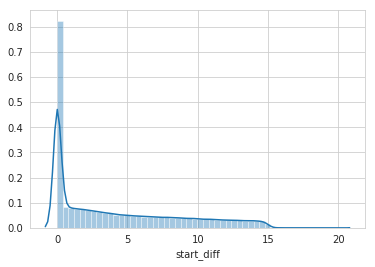

In [107]:
sns.distplot(clean_itineraries['start_diff'])

In [108]:
len(clean_itineraries)

1484366

In [109]:
len(clean_itineraries.user_trip_id.unique())

263270

In [110]:
exec_itineraries_with_scheduled_info = all_itineraries[(all_itineraries['itinerary_id'] == 0) & (pd.notnull(all_itineraries['planned_duration_mins']))][['date','user_trip_id']]

In [111]:
clean_itineraries2 = filter_trips_with_insufficient_alternatives(filter_trips_alternatives(all_itineraries.merge(exec_itineraries_with_scheduled_info, on=['date','user_trip_id'], how='inner')))

In [112]:
clean_itineraries2.head()

,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day_x,weekday,day_type,period_of_day_y,start_diff,num_alternatives
1264,2017-05-15 00:00:00,108.0,0,82.316667,89.266667,89.266667,2017-05-15 04:43:56,2017-05-15 04:43:45,2017-05-15 04:43:45,50+,4,early_morning,True,MON/FRI,early_morning,0.000000,2
1265,2017-05-15 00:00:00,108.0,1,58.100000,93.233333,89.266667,2017-05-15 04:57:38,2017-05-15 04:56:52,2017-05-15 04:43:45,50+,4,early_morning,True,MON/FRI,early_morning,13.116667,2
1266,2017-05-15 00:00:00,114.0,0,48.150000,53.850000,53.850000,2017-05-15 05:11:44,2017-05-15 04:44:46,2017-05-15 04:44:46,50+,4,early_morning,True,MON/FRI,early_morning,0.000000,2
1267,2017-05-15 00:00:00,114.0,1,62.283333,63.733333,53.850000,2017-05-15 04:59:44,2017-05-15 04:57:59,2017-05-15 04:44:46,50+,4,early_morning,True,MON/FRI,early_morning,13.216667,2
430,2017-05-09 00:00:00,122.0,0,46.400000,67.283333,67.283333,2017-05-09 05:31:32,2017-05-09 04:41:55,2017-05-09 04:41:55,50+,4,early_morning,True,TUE/WED/THU,early_morning,0.000000,3


In [113]:
len(clean_itineraries2)

1484366

In [114]:
len(clean_itineraries2.user_trip_id.unique())

263270

## Compute Inefficiency Metrics

![title](img/math_model.png)

In [115]:
def select_best_itineraries(trips_itineraries,metric_name):
    return trips_itineraries.sort_values([metric_name]) \
                        .groupby(['date','user_trip_id']) \
                        .nth(0) \
                        .reset_index()

### Observed Inefficiency

In [116]:
#Choose best itinerary for each trip by selecting the ones with lower actual duration
best_trips_itineraries = select_best_itineraries(clean_itineraries,'actual_duration_mins')

In [118]:
best_trips_itineraries.head()

,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day_x,weekday,day_type,period_of_day_y,start_diff,num_alternatives
0,2017-05-01 00:00:00,198.0,5,54.350000,51.000000,94.616667,2017-05-01 05:31:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning,14.50,5
1,2017-05-01 00:00:00,203.0,2,53.350000,79.883333,91.200000,2017-05-01 05:06:53,2017-05-01 05:07:23,2017-05-01 04:53:02,50+,4,early_morning,True,MON/FRI,early_morning,14.35,5
2,2017-05-01 00:00:00,214.0,0,33.316667,32.916667,32.916667,2017-05-01 05:08:29,2017-05-01 04:55:14,2017-05-01 04:55:14,30-40,4,early_morning,True,MON/FRI,early_morning,0.00,2
3,2017-05-01 00:00:00,221.0,0,69.716667,55.300000,55.300000,2017-05-01 05:09:12,2017-05-01 04:56:15,2017-05-01 04:56:15,50+,4,early_morning,True,MON/FRI,early_morning,0.00,2
4,2017-05-01 00:00:00,222.0,1,57.766667,86.716667,94.616667,2017-05-01 05:18:18,2017-05-01 05:04:09,2017-05-01 04:56:15,50+,4,early_morning,True,MON/FRI,early_morning,7.90,2


In [119]:
trips_inefficiency = best_trips_itineraries \
                        .assign(observed_inef = lambda x: x['exec_duration_mins']/x['actual_duration_mins'])

In [121]:
trips_inefficiency.head(10)

,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day_x,weekday,day_type,period_of_day_y,start_diff,num_alternatives,observed_inef
0,2017-05-01 00:00:00,198.0,5,54.350000,51.000000,94.616667,2017-05-01 05:31:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,early_morning,14.500000,5,1.855229
1,2017-05-01 00:00:00,203.0,2,53.350000,79.883333,91.200000,2017-05-01 05:06:53,2017-05-01 05:07:23,2017-05-01 04:53:02,50+,4,early_morning,True,MON/FRI,early_morning,14.350000,5,1.141665
2,2017-05-01 00:00:00,214.0,0,33.316667,32.916667,32.916667,2017-05-01 05:08:29,2017-05-01 04:55:14,2017-05-01 04:55:14,30-40,4,early_morning,True,MON/FRI,early_morning,0.000000,2,1.000000
3,2017-05-01 00:00:00,221.0,0,69.716667,55.300000,55.300000,2017-05-01 05:09:12,2017-05-01 04:56:15,2017-05-01 04:56:15,50+,4,early_morning,True,MON/FRI,early_morning,0.000000,2,1.000000
4,2017-05-01 00:00:00,222.0,1,57.766667,86.716667,94.616667,2017-05-01 05:18:18,2017-05-01 05:04:09,2017-05-01 04:56:15,50+,4,early_morning,True,MON/FRI,early_morning,7.900000,2,1.091101
5,2017-05-01 00:00:00,223.0,0,23.566667,21.333333,21.333333,2017-05-01 04:55:26,2017-05-01 04:56:19,2017-05-01 04:56:19,20-30,4,early_morning,True,MON/FRI,early_morning,0.000000,2,1.000000
6,2017-05-01 00:00:00,239.0,1,62.950000,97.033333,97.200000,2017-05-01 05:09:42,2017-05-01 05:10:46,2017-05-01 04:58:39,50+,4,early_morning,True,MON/FRI,early_morning,12.116667,4,1.001718
7,2017-05-01 00:00:00,264.0,2,66.683333,93.983333,96.300000,2017-05-01 05:18:08,2017-05-01 05:03:53,2017-05-01 05:01:34,50+,5,early_morning,True,MON/FRI,early_morning,2.316667,3,1.024650
8,2017-05-01 00:00:00,273.0,0,57.700000,41.150000,41.150000,2017-05-01 05:22:51,2017-05-01 05:02:37,2017-05-01 05:02:37,40-50,5,early_morning,True,MON/FRI,early_morning,0.000000,4,1.000000
9,2017-05-01 00:00:00,274.0,1,56.000000,71.300000,80.366667,2017-05-01 05:06:35,2017-05-01 05:11:46,2017-05-01 05:02:42,50+,5,early_morning,True,MON/FRI,early_morning,9.066667,3,1.127162


/local/tarciso/programs/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


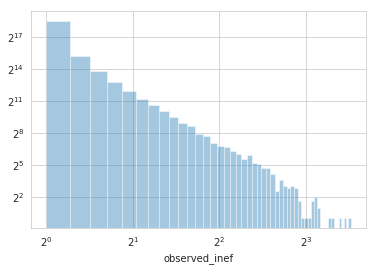

In [127]:
fig, ax = plt.subplots()
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
sns.distplot(trips_inefficiency.observed_inef, kde=False)
plt.show()

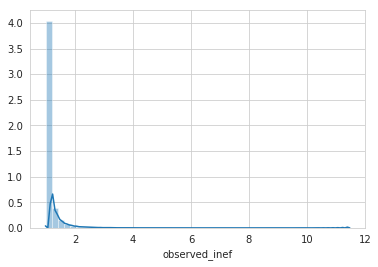

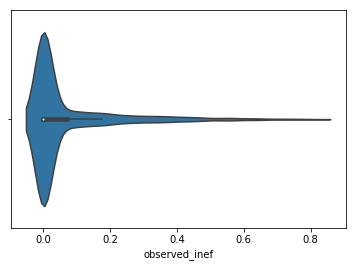

In [45]:
sns.violinplot(trips_inefficiency.observed_inef)

In [46]:
pos_trips_inefficiency = trips_inefficiency[trips_inefficiency['dur_diff'] > 1]

In [47]:
pos_trips_inefficiency.head()

,date,user_trip_id,Unnamed: 0,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day,weekday,day_type,start_diff,num_alternatives,dur_diff,observed_inef
0,2017-05-01 00:00:00,198.0,3448,5,54.350000,51.000000,94.616667,2017-05-01 05:31:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.500000,5,43.616667,0.460983
1,2017-05-01 00:00:00,203.0,3468,2,53.350000,79.883333,91.200000,2017-05-01 05:06:53,2017-05-01 05:07:23,2017-05-01 04:53:02,50+,4,early_morning,True,MON/FRI,14.350000,5,11.316667,0.124086
4,2017-05-01 00:00:00,222.0,3471,1,57.766667,86.716667,94.616667,2017-05-01 05:18:18,2017-05-01 05:04:09,2017-05-01 04:56:15,50+,4,early_morning,True,MON/FRI,7.900000,2,7.900000,0.083495
7,2017-05-01 00:00:00,264.0,3451,2,66.683333,93.983333,96.300000,2017-05-01 05:18:08,2017-05-01 05:03:53,2017-05-01 05:01:34,50+,5,early_morning,True,MON/FRI,2.316667,3,2.316667,0.024057
9,2017-05-01 00:00:00,274.0,3462,2,56.000000,71.300000,80.366667,2017-05-01 05:18:35,2017-05-01 05:11:46,2017-05-01 05:02:42,50+,5,early_morning,True,MON/FRI,9.066667,3,9.066667,0.112816


In [48]:
len(pos_trips_inefficiency)

1392

#### Number of Trips with/without improvent per Trip Length Bucket

In [49]:
trips_per_length = trips_inefficiency.groupby('trip_length_bucket').size().reset_index(name='total')

In [50]:
trips_per_length

,trip_length_bucket,total
0,10-20,1199
1,20-30,980
2,30-40,652
3,40-50,552
4,50+,1290


In [51]:
trips_per_length_improved = pos_trips_inefficiency.groupby('trip_length_bucket').size().reset_index(name='total')

In [52]:
trips_per_length_improved

,trip_length_bucket,total
0,10-20,124
1,20-30,154
2,30-40,183
3,40-50,192
4,50+,739


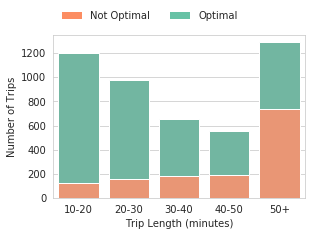

In [53]:
sns.set_style("whitegrid")

#Plot 1 - background - "total" (top) series
ax = sns.barplot(x = trips_per_length.trip_length_bucket, y = trips_per_length.total, color = "#66c2a5")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = trips_per_length_improved.trip_length_bucket, y = trips_per_length_improved.total, color = "#fc8d62")

bottom_plot.set(xlabel='Trip Length (minutes)',ylabel='Number of Trips')

topbar = plt.Rectangle((0,0),1,1,fc="#66c2a5", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#fc8d62',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Not Optimal', 'Optimal'], bbox_to_anchor=(0, 1.2), loc=2, ncol = 2, prop={'size':10})
l.draw_frame(False)

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/trip_length_by_optimality.pdf', bbox_inches='tight')

#### Per Trip Length Bucket

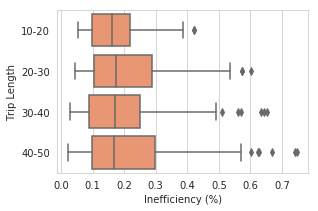

In [54]:
trip_len_order=['10-20','20-30','30-40','40-50']
ax = sns.boxplot(x='observed_inef',y='trip_length_bucket', orient='h', data=pos_trips_inefficiency, order=trip_len_order, color='#fc8d62')
ax.set(xlabel='Inefficiency (%)',ylabel='Trip Length')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_trip_length.pdf', bbox_inches='tight')

#### Per Period of Day

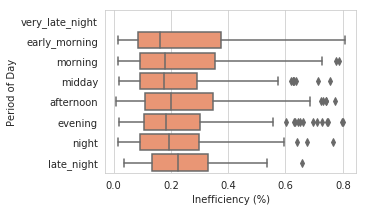

In [55]:
period_of_day_order = ['very_late_night','early_morning','morning','midday','afternoon','evening','night','late_night']
ax = sns.boxplot(x='observed_inef',y='period_of_day', data=pos_trips_inefficiency, order=period_of_day_order, color='#fc8d62')
ax.set(xlabel='Inefficiency (%)',ylabel='Period of Day')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

#### Per Weekday/Weekend

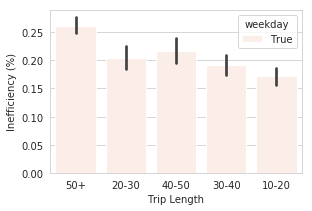

In [56]:
ax = sns.barplot(x='trip_length_bucket',y='observed_inef', hue='weekday', data=pos_trips_inefficiency, color='#fc8d62')
ax.set(xlabel='Trip Length',ylabel='Inefficiency (%)')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

#### Per Day Type

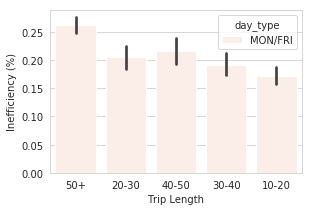

In [57]:
ax = sns.barplot(x='trip_length_bucket',y='observed_inef', hue='day_type', data=pos_trips_inefficiency, color='#fc8d62')
ax.set(xlabel='Trip Length',ylabel='Inefficiency (%)')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

### Schedule Inefficiency

In [58]:
shortest_planned_itineraries = select_best_itineraries(clean_itineraries[pd.notnull(clean_itineraries['planned_duration_mins'])],'planned_duration_mins') \
                            [['date','user_trip_id','planned_duration_mins','actual_duration_mins']] \
                            .rename(index=str,columns={'planned_duration_mins':'shortest_scheduled_planned_duration',
                                               'actual_duration_mins':'shortest_scheduled_observed_duration'})

shortest_planned_itineraries.head()

,date,user_trip_id,shortest_scheduled_planned_duration,shortest_scheduled_observed_duration
0,2017-05-01 00:00:00,198.0,49.200000,94.616667
1,2017-05-01 00:00:00,203.0,46.500000,91.200000
2,2017-05-01 00:00:00,214.0,33.316667,32.916667
3,2017-05-01 00:00:00,221.0,58.050000,100.616667
4,2017-05-01 00:00:00,222.0,50.633333,94.616667


In [59]:
sched_inef = best_trips_itineraries \
                .rename(index=str,columns={'actual_duration_mins':'shortest_observed_duration'}) \
                .merge(shortest_planned_itineraries, on=['date','user_trip_id'], how='inner') \
                .assign(sched_dur_diff = lambda x: x['shortest_scheduled_observed_duration'] - x['shortest_observed_duration']) \
                .assign(sched_inef = lambda x: x['sched_dur_diff']/x['shortest_scheduled_observed_duration'])

sched_inef.head()

,date,user_trip_id,Unnamed: 0,itinerary_id,planned_duration_mins,shortest_observed_duration,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,...,hour_of_day,period_of_day,weekday,day_type,start_diff,num_alternatives,shortest_scheduled_planned_duration,shortest_scheduled_observed_duration,sched_dur_diff,sched_inef
0,2017-05-01 00:00:00,198.0,3448,5,54.350000,51.000000,94.616667,2017-05-01 05:31:09,2017-05-01 05:06:47,2017-05-01 04:52:17,...,4,early_morning,True,MON/FRI,14.50,5,49.200000,94.616667,43.616667,0.460983
1,2017-05-01 00:00:00,203.0,3468,2,53.350000,79.883333,91.200000,2017-05-01 05:06:53,2017-05-01 05:07:23,2017-05-01 04:53:02,...,4,early_morning,True,MON/FRI,14.35,5,46.500000,91.200000,11.316667,0.124086
2,2017-05-01 00:00:00,214.0,2928,0,33.316667,32.916667,32.916667,2017-05-01 05:08:29,2017-05-01 04:55:14,2017-05-01 04:55:14,...,4,early_morning,True,MON/FRI,0.00,2,33.316667,32.916667,0.000000,0.000000
3,2017-05-01 00:00:00,221.0,2975,0,69.716667,55.300000,55.300000,2017-05-01 05:09:12,2017-05-01 04:56:15,2017-05-01 04:56:15,...,4,early_morning,True,MON/FRI,0.00,2,58.050000,100.616667,45.316667,0.450389
4,2017-05-01 00:00:00,222.0,3471,1,57.766667,86.716667,94.616667,2017-05-01 05:18:18,2017-05-01 05:04:09,2017-05-01 04:56:15,...,4,early_morning,True,MON/FRI,7.90,2,50.633333,94.616667,7.900000,0.083495


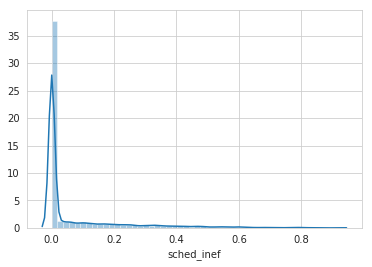

In [60]:
sns.distplot(sched_inef.sched_inef)

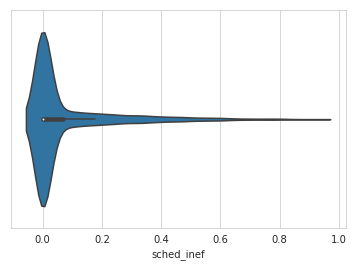

In [61]:
sns.violinplot(sched_inef.sched_inef)

In [62]:
pos_sched_inef = sched_inef[sched_inef['sched_dur_diff'] > 1]

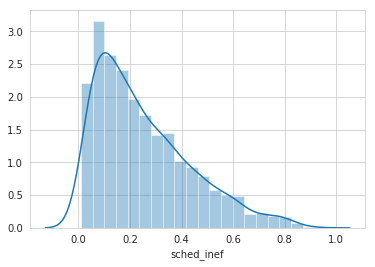

In [63]:
sns.distplot(pos_sched_inef.sched_inef)

#### Number of Trips with/without improvent per Trip Length Bucket

In [64]:
trips_per_length = sched_inef.groupby('trip_length_bucket').size().reset_index(name='total')

In [65]:
trips_per_length

,trip_length_bucket,total
0,10-20,1199
1,20-30,980
2,30-40,652
3,40-50,552
4,50+,1290


In [66]:
trips_per_length_improved = pos_sched_inef.groupby('trip_length_bucket').size().reset_index(name='total')

In [67]:
trips_per_length_improved

,trip_length_bucket,total
0,10-20,193
1,20-30,201
2,30-40,199
3,40-50,190
4,50+,596


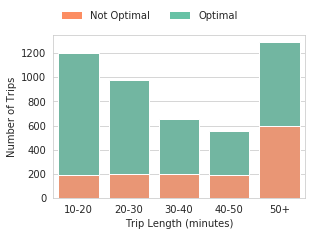

In [68]:
sns.set_style("whitegrid")

#Plot 1 - background - "total" (top) series
ax = sns.barplot(x = trips_per_length.trip_length_bucket, y = trips_per_length.total, color = "#66c2a5")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = trips_per_length_improved.trip_length_bucket, y = trips_per_length_improved.total, color = "#fc8d62")

bottom_plot.set(xlabel='Trip Length (minutes)',ylabel='Number of Trips')

topbar = plt.Rectangle((0,0),1,1,fc="#66c2a5", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#fc8d62',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Not Optimal', 'Optimal'], bbox_to_anchor=(0, 1.2), loc=2, ncol = 2, prop={'size':10})
l.draw_frame(False)

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/trip_length_by_optimality.pdf', bbox_inches='tight')

#### Per Trip Length Bucket

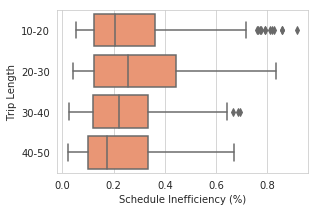

In [69]:
trip_len_order=['10-20','20-30','30-40','40-50']
ax = sns.boxplot(x='sched_inef',y='trip_length_bucket', orient='h', data=pos_sched_inef, order=trip_len_order, color='#fc8d62')
ax.set(xlabel='Schedule Inefficiency (%)',ylabel='Trip Length')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_trip_length.pdf', bbox_inches='tight')

#### Per Period of Day

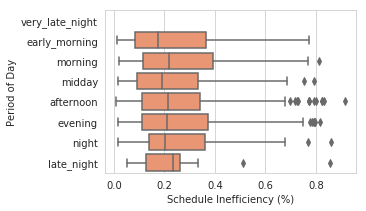

In [70]:
period_of_day_order = ['very_late_night','early_morning','morning','midday','afternoon','evening','night','late_night']
ax = sns.boxplot(x='sched_inef',y='period_of_day', data=pos_sched_inef, order=period_of_day_order, color='#fc8d62')
ax.set(xlabel='Schedule Inefficiency (%)',ylabel='Period of Day')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

#### Per Weekday/Weekend

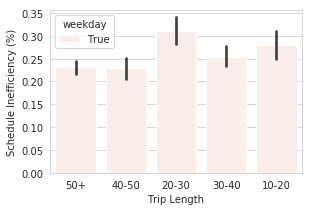

In [71]:
ax = sns.barplot(x='trip_length_bucket',y='sched_inef', hue='weekday', data=pos_sched_inef, color='#fc8d62')
ax.set(xlabel='Trip Length',ylabel='Schedule Inefficiency (%)')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

#### Per Day Type

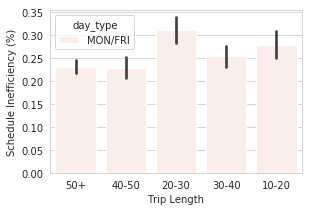

In [72]:
ax = sns.barplot(x='trip_length_bucket',y='sched_inef', hue='day_type', data=pos_sched_inef, color='#fc8d62')
ax.set(xlabel='Trip Length',ylabel='Schedule Inefficiency (%)')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

### User choice plan inefficiency

In [73]:
best_scheduled_itineraries = select_best_itineraries(clean_itineraries2,'planned_duration_mins') \
                                [['date','user_trip_id','planned_duration_mins']] \
                                .rename(index=str,columns={'planned_duration_mins':'best_planned_duration_mins'})

In [74]:
best_scheduled_itineraries.head()

,date,user_trip_id,best_planned_duration_mins
0,2017-05-01 00:00:00,198.0,49.200000
1,2017-05-01 00:00:00,203.0,46.500000
2,2017-05-01 00:00:00,214.0,33.316667
3,2017-05-01 00:00:00,221.0,58.050000
4,2017-05-01 00:00:00,222.0,50.633333


In [75]:
plan_inef = clean_itineraries2.merge(best_scheduled_itineraries, on=['date','user_trip_id'], how='inner') \
                [lambda x: x['itinerary_id'] == 0] \
                .assign(plan_dur_diff = lambda x: x['planned_duration_mins'] - x['best_planned_duration_mins']) \
                .assign(plan_inef = lambda x: x['plan_dur_diff']/x['planned_duration_mins'])

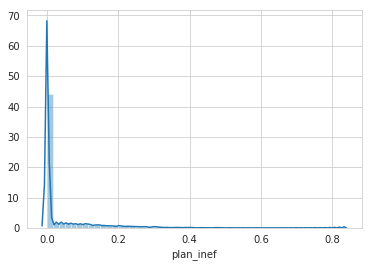

In [76]:
sns.distplot(plan_inef.plan_inef)

In [77]:
pos_plan_inef = plan_inef[plan_inef['plan_dur_diff'] > 1]

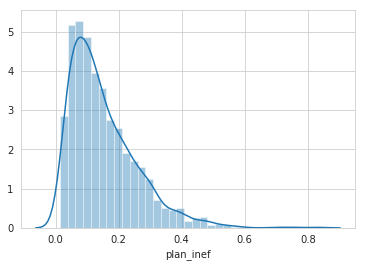

In [78]:
sns.distplot(pos_plan_inef.plan_inef)

#### Number of Trips with/without improvent per Trip Length Bucket

In [79]:
trips_per_length = plan_inef.groupby('trip_length_bucket').size().reset_index(name='total')

In [80]:
trips_per_length

,trip_length_bucket,total
0,10-20,1199
1,20-30,980
2,30-40,652
3,40-50,552
4,50+,1290


In [81]:
trips_per_length_improved = pos_plan_inef.groupby('trip_length_bucket').size().reset_index(name='total')

In [82]:
trips_per_length_improved

,trip_length_bucket,total
0,10-20,193
1,20-30,199
2,30-40,167
3,40-50,172
4,50+,455


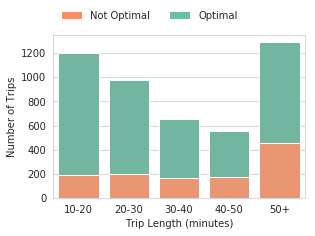

In [83]:
sns.set_style("whitegrid")

#Plot 1 - background - "total" (top) series
ax = sns.barplot(x = trips_per_length.trip_length_bucket, y = trips_per_length.total, color = "#66c2a5")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = trips_per_length_improved.trip_length_bucket, y = trips_per_length_improved.total, color = "#fc8d62")

bottom_plot.set(xlabel='Trip Length (minutes)',ylabel='Number of Trips')

topbar = plt.Rectangle((0,0),1,1,fc="#66c2a5", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#fc8d62',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Not Optimal', 'Optimal'], bbox_to_anchor=(0, 1.2), loc=2, ncol = 2, prop={'size':10})
l.draw_frame(False)

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/trip_length_by_optimality.pdf', bbox_inches='tight')

#### Per Trip Length Bucket

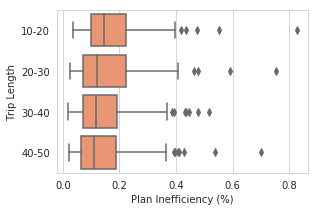

In [84]:
trip_len_order=['10-20','20-30','30-40','40-50']
ax = sns.boxplot(x='plan_inef',y='trip_length_bucket', orient='h', data=pos_plan_inef, order=trip_len_order, color='#fc8d62')
ax.set(xlabel='Plan Inefficiency (%)',ylabel='Trip Length')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_trip_length.pdf', bbox_inches='tight')

#### Per Period of Day

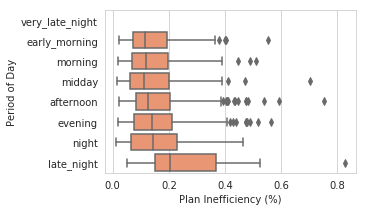

In [85]:
period_of_day_order = ['very_late_night','early_morning','morning','midday','afternoon','evening','night','late_night']
ax = sns.boxplot(x='plan_inef',y='period_of_day', data=pos_plan_inef, order=period_of_day_order, color='#fc8d62')
ax.set(xlabel='Plan Inefficiency (%)',ylabel='Period of Day')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

#### Per Weekday/Weekend

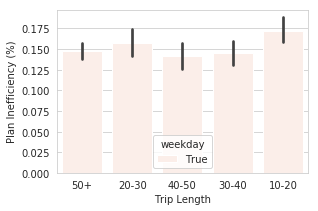

In [86]:
ax = sns.barplot(x='trip_length_bucket',y='plan_inef', hue='weekday', data=pos_plan_inef, color='#fc8d62')
ax.set(xlabel='Trip Length',ylabel='Plan Inefficiency (%)')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

#### Per Day Type

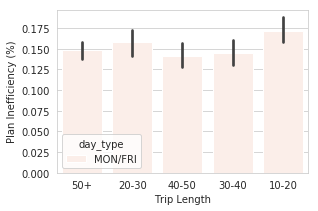

In [87]:
ax = sns.barplot(x='trip_length_bucket',y='plan_inef', hue='day_type', data=pos_plan_inef, color='#fc8d62')
ax.set(xlabel='Trip Length',ylabel='Plan Inefficiency (%)')

fig = ax.get_figure()
fig.set_size_inches(4.5, 3)
#fig.savefig('/local/tarciso/masters/data/results/imp_capacity_per_day_period.pdf', bbox_inches='tight')

#### System Schedule Deviation
$$
\begin{equation*}
    {Oe - Op}
\end{equation*}
$$

In [88]:
sched_deviation = clean_itineraries[clean_itineraries['itinerary_id'] > 0] \
                    .assign(sched_dev = lambda x: x['actual_duration_mins'] - x['planned_duration_mins'])
    
sched_deviation.head()

,Unnamed: 0,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day,weekday,day_type,start_diff,num_alternatives,sched_dev
1,3444,2017-05-01 00:00:00,198.0,1,51.816667,59.00,94.616667,2017-05-01 04:52:55,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,7.183333
2,3445,2017-05-01 00:00:00,198.0,2,54.816667,57.90,94.616667,2017-05-01 05:06:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,3.083333
3,3447,2017-05-01 00:00:00,198.0,4,52.366667,59.00,94.616667,2017-05-01 05:19:22,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,6.633333
4,3448,2017-05-01 00:00:00,198.0,5,54.350000,51.00,94.616667,2017-05-01 05:31:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,-3.350000
7,3467,2017-05-01 00:00:00,203.0,1,54.433333,100.95,91.200000,2017-05-01 04:53:38,2017-05-01 05:07:23,2017-05-01 04:53:02,50+,4,early_morning,True,MON/FRI,14.35,5,46.516667


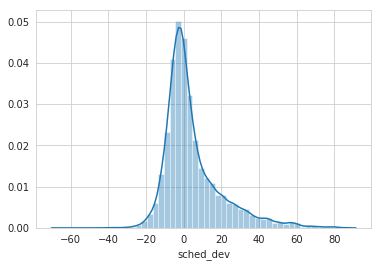

In [89]:
sns.distplot(sched_deviation.sched_dev)

#### User stop waiting time offset
$$
\begin{equation*}
    {start(Oe) - start(Op)}
\end{equation*}
$$

In [90]:
user_boarding_timediff = clean_itineraries[clean_itineraries['itinerary_id'] > 0] \
                    .assign(boarding_timediff = lambda x: (x['actual_start_time'] - x['planned_start_time'])/pd.Timedelta(minutes=1))
    
user_boarding_timediff.head()

,Unnamed: 0,date,user_trip_id,itinerary_id,planned_duration_mins,actual_duration_mins,exec_duration_mins,planned_start_time,actual_start_time,exec_start_time,trip_length_bucket,hour_of_day,period_of_day,weekday,day_type,start_diff,num_alternatives,boarding_timediff
1,3444,2017-05-01 00:00:00,198.0,1,51.816667,59.00,94.616667,2017-05-01 04:52:55,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,13.866667
2,3445,2017-05-01 00:00:00,198.0,2,54.816667,57.90,94.616667,2017-05-01 05:06:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,0.633333
3,3447,2017-05-01 00:00:00,198.0,4,52.366667,59.00,94.616667,2017-05-01 05:19:22,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,-12.583333
4,3448,2017-05-01 00:00:00,198.0,5,54.350000,51.00,94.616667,2017-05-01 05:31:09,2017-05-01 05:06:47,2017-05-01 04:52:17,50+,4,early_morning,True,MON/FRI,14.50,5,-24.366667
7,3467,2017-05-01 00:00:00,203.0,1,54.433333,100.95,91.200000,2017-05-01 04:53:38,2017-05-01 05:07:23,2017-05-01 04:53:02,50+,4,early_morning,True,MON/FRI,14.35,5,13.750000


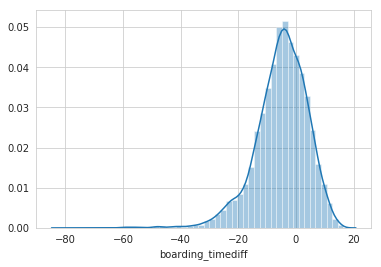

In [91]:
sns.distplot(user_boarding_timediff.boarding_timediff)